In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/BUILDINGNEURALNETWORKS/INTROTONEURALNETWORKS BUILDINGNEURALNETWORKS 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [3]:
#=================================================-
#### Slide 6: Loading packages  ####

# Helper packages.
from pathlib import Path 
import matplotlib.pyplot as plt
import numpy as np                                    
import pandas as pd
import pickle
from textwrap import wrap
# Scikit-learn package for building a perceptron.
from sklearn.neural_network import MLPClassifier

# Scikit-learn package for data preprocessing.
from sklearn.preprocessing import MinMaxScaler
# Model set up, tuning and model metrics packages.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV




In [5]:
#=================================================-
#### Slide 5: Directory settings  ####

# Set 'main_dir' to location of the project folder
data_dir = Path.cwd().parent / "data"
data_dir.exists()

True

In [17]:
#=================================================-
#### Slide 7: Load the data  ####

credit_card = pd.read_csv(data_dir / 'credit_card_data.csv')
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
#=================================================-
#### Slide 9: The data at first glance  ####

# The data types.
print(credit_card.dtypes)

ID                              int64
LIMIT_BAL                       int64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                       int64
BILL_AMT3                       int64
BILL_AMT4                       int64
BILL_AMT5                       int64
BILL_AMT6                       int64
PAY_AMT1                        int64
PAY_AMT2                        int64
PAY_AMT3                        int64
PAY_AMT4                        int64
PAY_AMT5                        int64
PAY_AMT6                        int64
default_payment_next_month      int64
dtype: object


In [9]:
#=================================================-
#### Slide 10: Check for NAs in the dataset  ####

# Check for NAs. 
print(credit_card.isna().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     1
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64


In [18]:
#=================================================-
#### Slide 11: Using fillna() to handle missing values  ####

 # Fill missing values with mean 
credit_card = credit_card.fillna(credit_card.mean()['BILL_AMT1'])
 # Check for NAs in 'BILL_AMT1'. 
print(credit_card.isna().sum()['BILL_AMT1'])
# Drop an unnecessary identifier column.
credit_card = credit_card.drop('ID',axis = 1)




0


In [14]:
#=================================================-
#### Slide 15: Transform and replace categorical variables  ####

# Convert 'sex' into dummy variables.
sex = pd.get_dummies(credit_card['SEX'], prefix = 'sex', drop_first = True)
# Convert 'education' into dummy variables.
education = pd.get_dummies(credit_card['EDUCATION'], prefix = 'education', drop_first = True)
# Convert 'marriage' into dummy variables.
marriage = pd.get_dummies(credit_card['MARRIAGE'], prefix = 'marriage', drop_first = True)
# Drop `sex`, `education`, `marriage` from the data.
credit_card.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis = 1, inplace = True)
# Concatenate `sex`, `education`, `marriage` dummies to our dataset.
credit_card = pd.concat([credit_card, sex, education, marriage], axis=1)
credit_card.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,sex_2,education_1,education_2,education_3,education_4,education_5,education_6,marriage_1,marriage_2,marriage_3
0,20000,24,2,2,-1,-1,-2,-2,3913.0,3102,...,1,0,1,0,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682.0,1725,...,1,0,1,0,0,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239.0,14027,...,1,0,1,0,0,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990.0,48233,...,1,0,1,0,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617.0,5670,...,0,0,1,0,0,0,0,1,0,0


In [27]:
# Create into dummy variables.
credit_card = pd.get_dummies(
    credit_card,
    columns=['EDUCATION', 'MARRIAGE', "SEX"],
    prefix=['education', 'marriage', "sex"],
    drop_first=True,
)

In [28]:
credit_card2.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,education_1,education_2,education_3,education_4,education_5,education_6,marriage_1,marriage_2,marriage_3,sex_2
0,20000,24,2,2,-1,-1,-2,-2,3913.0,3102,...,0,1,0,0,0,0,1,0,0,1
1,120000,26,-1,2,0,0,0,2,2682.0,1725,...,0,1,0,0,0,0,0,1,0,1
2,90000,34,0,0,0,0,0,0,29239.0,14027,...,0,1,0,0,0,0,0,1,0,1
3,50000,37,0,0,0,0,0,0,46990.0,48233,...,0,1,0,0,0,0,1,0,0,1
4,50000,57,-1,0,-1,0,0,0,8617.0,5670,...,0,1,0,0,0,0,1,0,0,0


In [29]:
#=================================================-
#### Slide 16: Data prep: split  ####

# Separate predictors from data.
X = credit_card.drop(['default_payment_next_month'], axis=1)

# Separate target from data.
y = credit_card['default_payment_next_month']
# Split data into train and test set, use a 70 - 30 split.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.3,
                                                    random_state=1)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (21000, 30) Test shape: (9000, 30)


In [31]:
X_train.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,education_1,education_2,education_3,education_4,education_5,education_6,marriage_1,marriage_2,marriage_3,sex_2
4936,20000,24,-1,-1,-1,-1,-1,-2,390.0,390,...,1,0,0,0,0,0,0,1,0,0
4788,120000,52,2,0,0,0,0,0,107269.0,106791,...,0,1,0,0,0,0,1,0,0,0
8447,70000,26,0,0,0,0,0,0,23409.0,23174,...,0,1,0,0,0,0,0,1,0,1
4535,230000,37,1,-2,-2,-2,-2,-2,0.0,0,...,0,1,0,0,0,0,0,1,0,0
27563,130000,56,0,0,0,0,0,0,121165.0,109805,...,0,1,0,0,0,0,0,1,0,0


In [32]:
#=================================================-
#### Slide 17: Data prep: scale with MinMaxScaler  ####

# Transforms each feature to a given range.
# The default is the range between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

pd.DataFrame(X_train_scaled, columns=X.columns).head()
#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,education_1,education_2,education_3,education_4,education_5,education_6,marriage_1,marriage_2,marriage_3,sex_2
0,0.010101,0.051724,0.1,0.111111,0.1,0.1,0.1,0.0,0.146864,0.064592,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.111111,0.534483,0.4,0.222222,0.2,0.2,0.2,0.2,0.241440,0.165786,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.060606,0.086207,0.2,0.222222,0.2,0.2,0.2,0.2,0.167233,0.086261,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.222222,0.275862,0.3,0.000000,0.0,0.0,0.0,0.0,0.146519,0.064221,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.121212,0.603448,0.2,0.222222,0.2,0.2,0.2,0.2,0.253736,0.168653,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/BUILDINGNEURALNETWORKS/INTROTONEURALNETWORKS BUILDINGNEURALNETWORKS 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [41]:
#=================================================-
#### Slide 2: Build the model architecture  ####

# Build neural network model
nn = MLPClassifier(hidden_layer_sizes=64, random_state=1)

In [43]:
#=================================================-
#### Slide 3: Fit the model to training data  ####

# Fit the saved model to your training data.
nn.fit(X_train_scaled, y_train)  

MLPClassifier(hidden_layer_sizes=64, random_state=1)

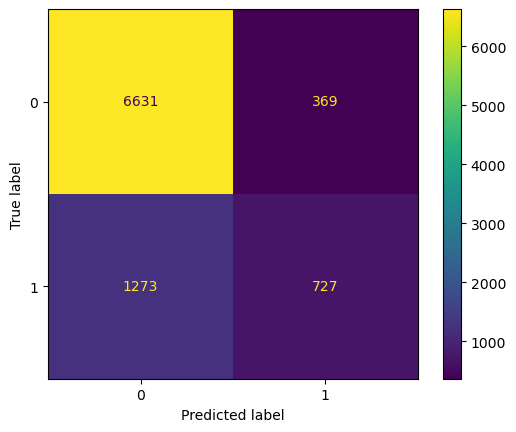

In [57]:
metrics.ConfusionMatrixDisplay.from_estimator(nn, X_test_scaled, y_test)

In [50]:
#=================================================-
#### Slide 4: Inspect accuracy of training model  ####

# Compute accuracy using training data.
acc_train_nn = nn.score(X_train_scaled, y_train)
print("Train Accuracy:", acc_train_nn)

Train Accuracy: 0.8266190476190476


In [63]:
#=================================================-
#### Slide 4: Inspect accuracy of training model  ####

# Compute accuracy using training data.
acc_test_nn = nn.score(X_test_scaled, y_test)
print("Train Accuracy:", acc_test_nn)

Train Accuracy: 0.8175555555555556


0.7720735714285715

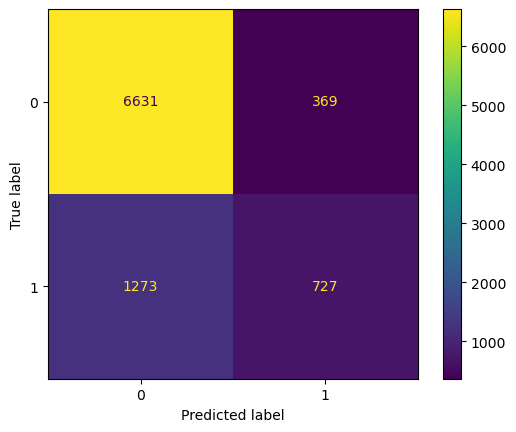

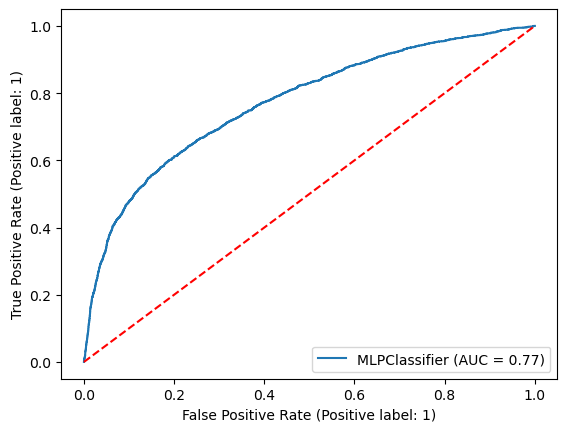

In [79]:
cmd = metrics.ConfusionMatrixDisplay.from_estimator(nn, X_test_scaled, y_test)
cmd.confusion_matrix
rcd = metrics.RocCurveDisplay.from_estimator(nn, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1],'r--')
rcd.roc_auc

In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/BUILDINGNEURALNETWORKS/INTROTONEURALNETWORKS BUILDINGNEURALNETWORKS 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [ ]:
#=================================================-
#### Slide 12: Fitting & visualizing training history: accuracy   ####

N_EPOCHS = 25                     #<- number of epochs
N_CLASSES = np.unique(y_train)    #<- number of classes in the target variable 

# Build neural network model by creating a classifier:
# add the number of hidden neurons in the 1st hidden layer and set random state.
mlp = MLPClassifier(hidden_layer_sizes = (64), random_state = 1)          

scores_train = [] #<- we will store scores for training history here
scores_test = []  #<- we will store scores for testing history here

epoch = 0 #<- set epoch count
while epoch < N_EPOCHS:
    mlp_fit = mlp.partial_fit(X_train_scaled, y_train, classes=N_CLASSES)
    
    # Compute score for train data.
    scores_train.append(mlp.score(X_train_scaled, y_train))
    
    # Compute score for test data.
    scores_test.append(mlp.score(X_test_scaled, y_test))
    epoch += 1 #<- increment the epoch





In [ ]:
#=================================================-
#### Slide 13: Inspect model accuracy and loss  ####

plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()
plt.plot(mlp.loss_curve_)
plt.title("Loss over epochs", fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()                      




In [ ]:
#=================================================-
#### Slide 14: Inspect model accuracy and loss  ####

plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()




In [ ]:
#=================================================-
#### Slide 17: Class-imbalanced dataset challenges  ####

print(credit_card['default_payment_next_month'].value_counts())




In [ ]:
#=================================================-
#### Slide 20: Balancing target with SMOTE (cont'd)  ####

from imblearn.over_sampling import SMOTE

# Let's initialize SMOTE object.
smote = SMOTE()

# We can now fit the sampling method to our train data and labels.
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)
print(y_train_sm.value_counts())




In [ ]:
#=================================================-
#### Slide 23: Exercise  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
